# 생선 분류 인공지능

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/1-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

### 연어 데이터 준비하기

In [45]:
salmon_length  = [ 25.4 , 26.3 , 26.5 , 29.0 , 29.0 , 29.7 , 29.7 , 30.0 , 30.0 , 30.7 , 31.0 , 31.0 , 31.5 , 32.0 , 32.0 , 32.0 , 33.0 , 33.0 , 33.5 , 33.5 , 34.0 , 34.0 , 34.5 , 35.0 , 35.0 , 35.0 , 35.0 , 36.0 , 36.0 , 37.0 , 38.5 , 38.5 , 39.5 , 41.0 , 41.0, 41.5, 41.5, 41.5, 42.0, 42.0 ]
salmon_weight  = [ 242.0 , 290.0 , 340.0 , 363.0 , 430.0 , 450.0 , 500.0 , 390.0 , 450.0 , 500.0 , 475.0 , 500.0 , 500.0 , 340.0 , 600.0 , 600.0 , 700.0 , 700.0 , 610.0 , 650.0 , 575.0 , 685.0 , 620.0 , 680.0 , 700.0 , 725.0 , 720.0 , 714.0 , 850.0 , 1000.0 , 920.0 , 955.0 , 925.0 , 975.0 , 950.0, 980.0, 995.0, 990.0, 1000.0, 1005.0 ]



### 산점도

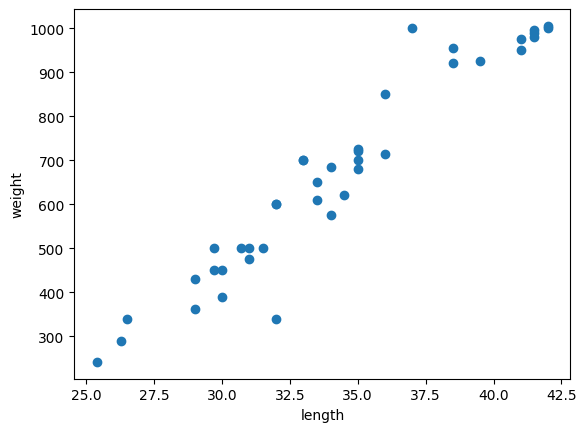

In [46]:
import matplotlib.pyplot as plt # matplotlib의 pyplot 함수를 plt로 줄여서 사용
plt.scatter(salmon_length, salmon_weight)
# 산점도 그래프의 연어 길이와 무게를 x,y 값으로 사용
plt.xlabel('length') # x축은 길이
plt.ylabel('weight') # y축은 무게
plt.show()


### 빙어 데이터 준비하기

In [47]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 14.8, 15.0, 15.2]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.8, 19.9, 20.1]

### 산점도

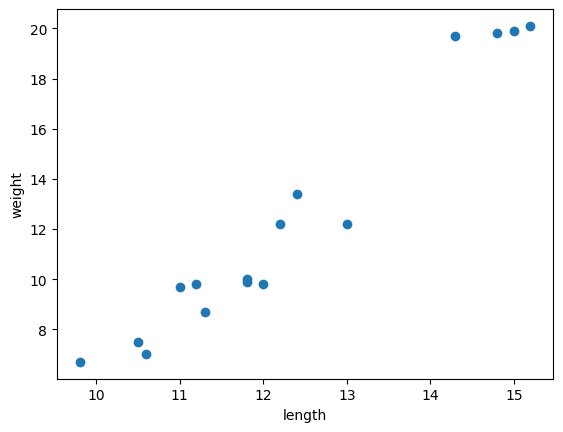

In [48]:
plt.scatter(smelt_length, smelt_weight) # 빙어 데이터 산점도
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 연어와 빙어 산점도

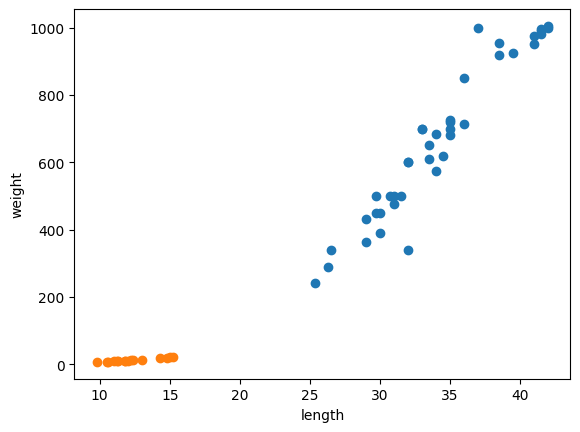

In [49]:
plt.scatter(salmon_length, salmon_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


## 연어와 빙어 데이터 합치기

In [50]:
fish_length = salmon_length + smelt_length
fish_weight = salmon_weight + smelt_weight
print(fish_length)
print(fish_weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 41.5, 41.5, 41.5, 42.0, 42.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 14.8, 15.0, 15.2]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 980.0, 995.0, 990.0, 1000.0, 1005.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.8, 19.9, 20.1]


### 넘파이로 2차원 리스트 만들기

In [51]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
# fish.data = [[l, w] for l, w in zip(lenght, weight)]
print(fish_data)
# 머신러닝, 딥러닝은 입력값은 항상 2차원 배열이어야 함!

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [  41.5  980. ]
 [  41.5  995. ]
 [  41.5  990. ]
 [  42.  1000. ]
 [  42.  1005. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  14.8   19.8]
 [  15.    19.9]
 [  15.2   20.1]]


### 정답 데이터 생성

In [52]:
fish_target = np.concatenate((np.ones(40), np.zeros(16)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [53]:
from sklearn.model_selection import train_test_split # train_test_split()함수는 비율에 맞게 훈련 세트와 테스트 세트로 나눔

In [54]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target,random_state=42, test_size=0.25)
# 기본적으로 25%를 테스트 세트로 분류, stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 나눔
#test_size=0.25 는 아무것도 안 적으면 기본값

In [55]:
print(train_input.shape, test_input.shape) # 입력 데이터의 크기를 출력

(42, 2) (14, 2)


In [56]:
print(train_target.shape, test_target.shape)

(42,) (14,)


### 모델 생성 및 훈련


In [57]:
from sklearn.neighbors import KNeighborsClassifier# 파이썬 패키지 전체를 임포트하지 않고 특정 클래스만 임포트하려면 from~import 구문 사용

In [58]:
kn = KNeighborsClassifier()                  # 객체를 먼저 생성

In [59]:
kn.fit(train_input, train_target)              # 연어를 찾을 기준을 학습, fit 메서드가 이런 역활을 수행

KNeighborsClassifier()

### 모델 평가

In [60]:
kn.score(test_input, test_target)     # 모델을 평가하는 메서드는 score() 메서드로 0에서1 사이의 값을 반환

1.0

### 새로운 데이터의 산점도 위치

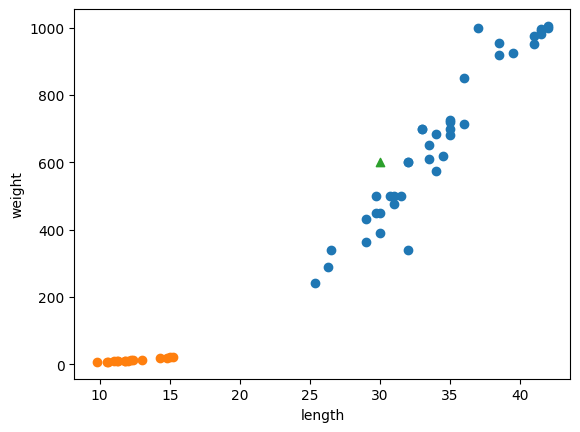

In [61]:
plt.scatter(salmon_length, salmon_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 새로운 데이터로 예측된 결과

In [62]:
kn.predict([[30,600]])

array([1.])

In [63]:
kn.predict([[1,200]])

array([1.])

## 데이터 전처리
### 수상한 연어

In [64]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [65]:
print(kn.predict([[25, 150]])) # [25, 100]인 새로운 연어 데이터를 넣고 예측, 결과는 빙어?

[0.]


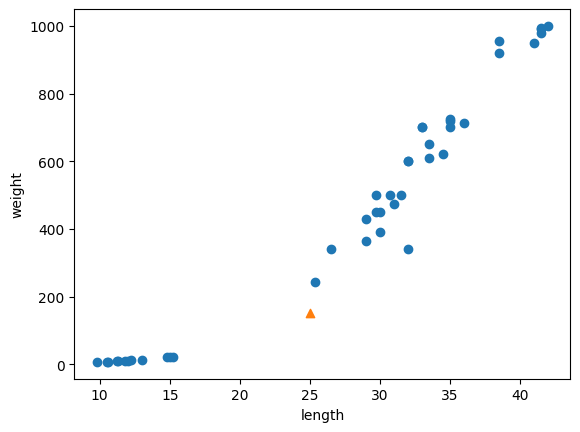

In [66]:
import matplotlib.pyplot as plt # 산점도를 그려 눈으로 확인
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [67]:
distances, indexes = kn.kneighbors([[25, 150]]) # 모델에서 입력된 값과 가까운 5개의 데이터를 찾음

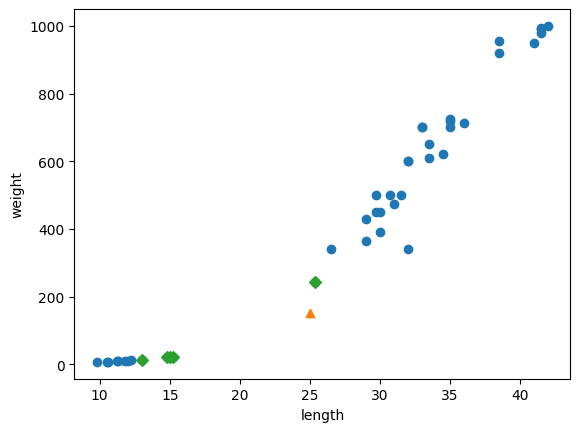

In [68]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [69]:
print(train_input[indexes]) # 찾은 5개의 값

[[[ 25.4 242. ]
  [ 15.2  20.1]
  [ 15.   19.9]
  [ 14.8  19.8]
  [ 13.   12.2]]]


In [70]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [71]:
print(distances)

[[ 92.00086956 130.26914447 130.48375378 130.59892802 138.32150953]]


### 기준 맞추기

알고리즘이 거리 기반으로 데이터를 표현하는 기준이 다르면 올바르게 예측을 할 수 없음, 이런 알고리즘들은 샘플 간의 거리에 영향을 많이 받으므로 제대로 사용하려면 특성값을 일정한 기준으로 맞춰 줘야함. 이런 작업을 데이터 전처리하고 부름

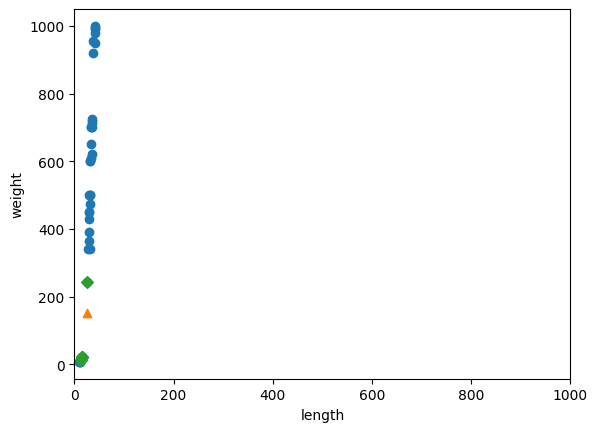

In [72]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 표준 점수로 바꾸기

In [73]:
mean = np.mean(train_input, axis=0) # 가장 널리 사용되는 것은 표준 점수((데이터 값-평균)/표준편차)
std = np.std(train_input, axis=0) # 평균과 표준편차는 각 특성별로 계산해야하며 이를 위해 axis=0 지정

In [74]:
print(mean, std)

[ 27.59285714 458.3952381 ] [ 10.45615319 339.12122074]


In [75]:
train_scaled = (train_input - mean) / std # 표준 점수로 변환

## 연어 다시 표시

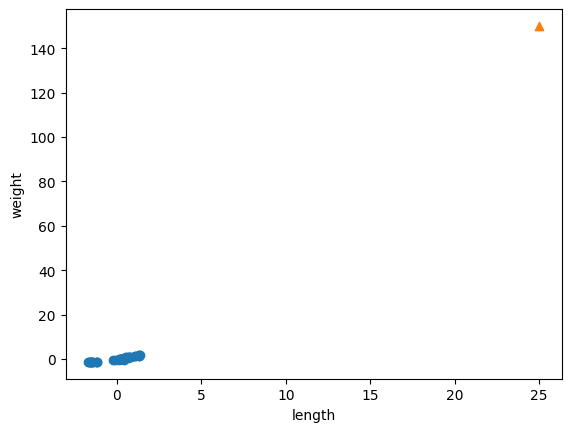

In [76]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [77]:
new = ([25, 150] - mean) / std # 예측하고자하는 데이터도 동일한 비율로 변환

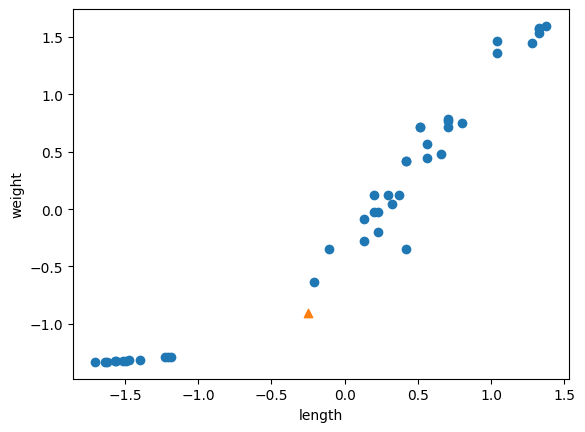

In [78]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 전처리 데이터로 모델 다시 훈련하기

In [79]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [80]:
test_scaled = (test_input - mean) / std # 테스트 세트(test_data)도 훈련 세트와 마찬가지로 표준 점수로 변환

In [81]:
kn.score(test_scaled, test_target)

1.0

In [82]:
print(kn.predict([new]))

[1.]


In [83]:
distances, indexes = kn.kneighbors([new])

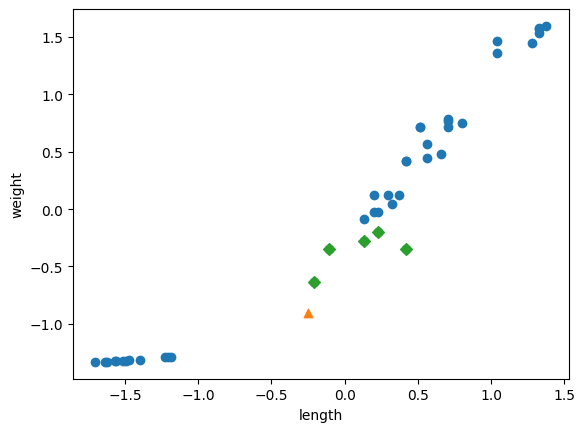

In [84]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()